In [5]:
import numpy as np
import cv2
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [9]:
db1 = np.load("db_descriptors.npy")
db2 = np.load("test_descriptors.npy")
gtLabels = []
predLabels = []
index = 0

for index1, descriptor1 in enumerate(db1):
    d_min = 100000   # some random high value
    testObjectType = descriptor1[1]
    for index2, descriptor2 in enumerate(db2):
        d1 = descriptor1[0]
        d2 = descriptor2[0]
                
        dist = np.linalg.norm(d1 - d2)
                
        if dist < d_min:  # distance smaller --> better match
            d_min = dist
            index = index2
                    
    dbObjectType = db2[index][1]
                    
    gtLabels.append(testObjectType)
    predLabels.append(dbObjectType)

In [7]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[265   0   0   2   0]
 [  0 267   0   0   0]
 [  0  11 252   4   0]
 [  5   0   4 258   0]
 [  0   0   0   0 267]]
Normalized confusion matrix
[[ 0.99  0.    0.    0.01  0.  ]
 [ 0.    1.    0.    0.    0.  ]
 [ 0.    0.04  0.94  0.01  0.  ]
 [ 0.02  0.    0.01  0.97  0.  ]
 [ 0.    0.    0.    0.    1.  ]]


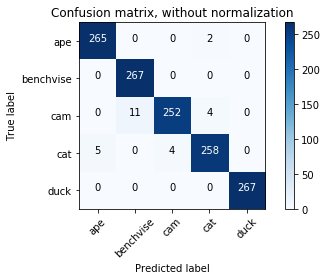

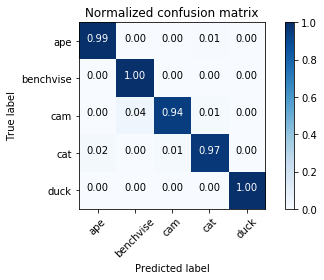

In [10]:
class_names = ["ape", "benchvise", "cam", "cat", "duck"]

# Compute confusion matrix
cnf_matrix = confusion_matrix(gtLabels, predLabels)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()